# Chapter 5
# Resampling Methods 

It involves repeatedly drawing samples from a training set and refitting a model of interest on each sample in order to obtain additional information about the fitted model. 

The process of evaluating a model's performance is known __model assessment.__

The process of selecting the proper level of flexibility for a model is known as __model selection.__

## Cross Validation :-

In absence of large designated test dataset, we can use the cross validation approach to estimate the test error rate by holding out a subset from training data.

### 1. Validation set approach :- 
It invloves randomly dividing the available set of observations into two parts, a training set, and a validation or hold-out set. The model is fit on the training set, and the fitted model is used to predict the responses for the observations in the validation set. 

The resulting validation set error rate, typically assessed using MSE in case of a quantitative response provides an estimate of the test error rate.

In [57]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

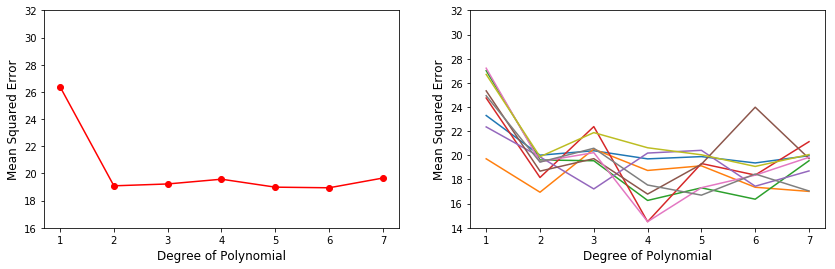

In [69]:
# Loading Auto dataset
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Auto.csv"
Auto = pd.read_csv(url, error_bad_lines = False, na_values = '?')

y = np.array(Auto.mpg)
X = np.array(Auto.horsepower).reshape(-1,1)

# Dividing the dataset in training and validation and getting validation MSE for different polynomial.
MSE = []
for i in range(7):
    polynomial_features= PolynomialFeatures(degree=i+1)
    xp = polynomial_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(xp, y, test_size=0.5, random_state=20)
    model = sm.OLS(y_train,X_train).fit()
    MSE.append(mean_squared_error(y_test, model.predict(X_test)))
    
fig = plt.figure(figsize = (14,4))
ax1 = fig.add_subplot(121)
ax1.plot(list(range(1,8)), MSE, '-ok', color = "r")
ax1.set_ylim(16,32)
ax1.set_xlabel('Degree of Polynomial', fontsize = '12')
ax1.set_ylabel('Mean Squared Error', fontsize = '12')

# Dividing the dataset by setting different random state.

ax2 = fig.add_subplot(122)

for k in range(9):
    MSE = []
    for i in range(7):
        polynomial_features= PolynomialFeatures(degree=i+1)
        xp = polynomial_features.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(xp, y, test_size=0.5, random_state=random.randint(1,100))
        model = sm.OLS(y_train,X_train).fit()
        MSE.append(mean_squared_error(y_test, model.predict(X_test)))
        
    ax2.plot(list(range(1,8)), MSE)
    
ax2.set_ylim(14,32)
ax2.set_xlabel('Degree of Polynomial', fontsize = '12')
ax2.set_ylabel('Mean Squared Error', fontsize = '12')

plt.show()

We can see the drawback of this approach in above plot. The validation error can be vary a lot depends on how we split the data. However all the plot shows that, MSE drops suddenly after adding polynomial of degree 2 and there is no use of adding polynomial terms of degree 3 or above. So it does help us in selecting the right model.

__Drawback:-__
1. The validation estimate of the test error can be highly variance , depending on precisely which observations are included in the training set and which are included in the validation set.
2. Since only a subset of observations are used to fit the model. Since statistical method tnd to perform worse when trained on fewer observations. This suggest that validation error rate tends to overestimate the test error rate for the model fit on the entire data set.

### Leave-One-Out-Cross-Validation (LOOCV) :-
In LOOCV, a single observation is used for the validation set, and the remaining observation make up the training set.

Since one observation ($i^{th}$) is not used in the fitting process, ${MSE}_i = (y_i - \hat y_i)$ provides an approximately unbiased estimate for the test error, but it is highly variable since it is based on single observation.